Library berhasil diimpor

--- Silakan Unggah File CSV Data Anda ---


Saving StudentMentalHealth_dirty.csv to StudentMentalHealth_dirty.csv

 Data 'StudentMentalHealth_dirty.csv' berhasil dimuat ke DataFrame (df)!
--------------------------------------------------
--- Tunjukkan 5 Baris Pertama Data ---
     Name  Gender   Age Education Level Screen Time (hrs/day)  \
0   Aarav    Male  15.0         Class 8                   7.1   
1   Meera  Female  25.0             MSc                   3.3   
2  Ishaan    Male  20.0           BTech                   9.5   
3  Aditya    Male  20.0              BA                  10.8   
4   Anika  Female  17.0        Class 11                   2.8   

   Sleep Duration (hrs)  Physical Activity (hrs/week) Stress Level  \
0                   8.9                           9.3       Medium   
1                  -5.0                           0.2       Medium   
2                 150.0                           6.2       Medium   
3                   5.6                           5.5         High   
4                   5.4  

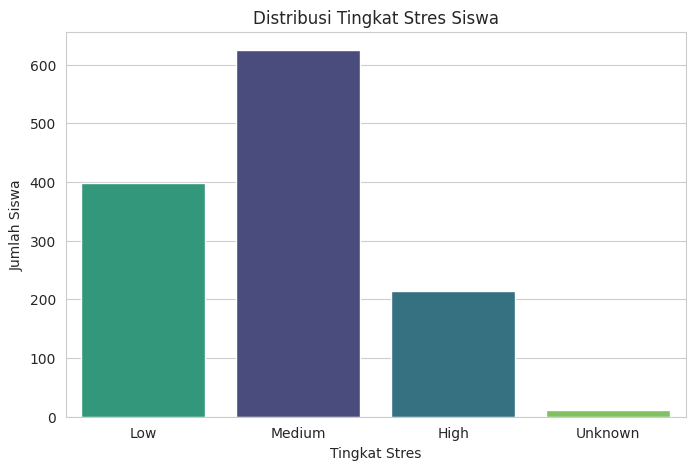

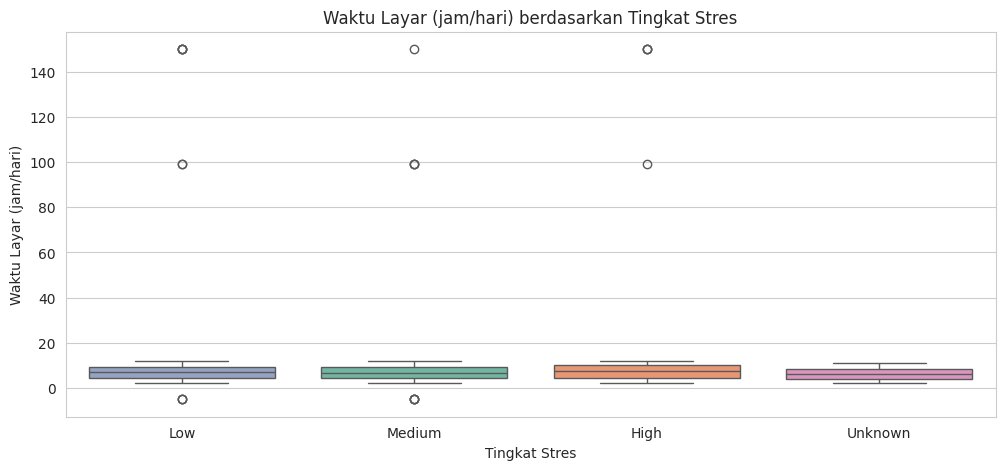

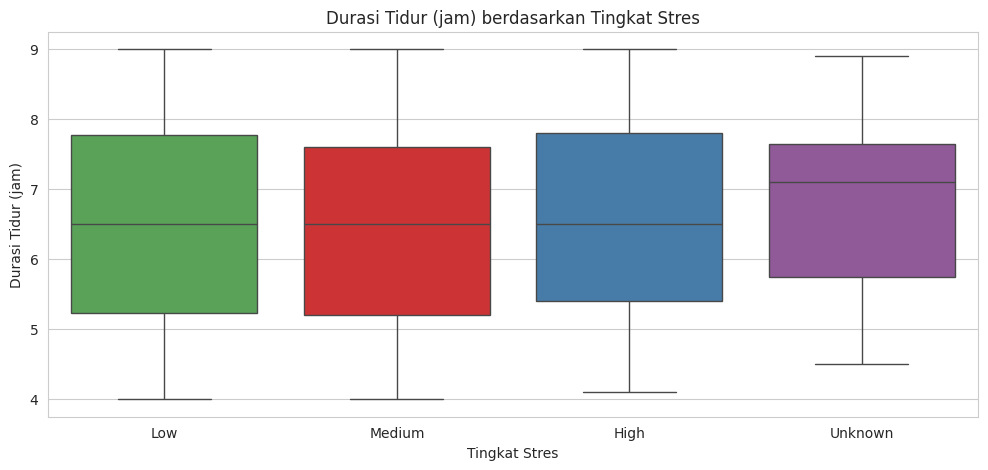

--------------------------------------------------
--- Persiapan Data untuk Model Prediksi ---
 Stress Level berhasil di-encode.
 Variabel kategorikal (kecuali Name) berhasil di-encode (One-Hot).

Jumlah Fitur (X): 23
Ukuran Dataset: (1250, 23)
--------------------------------------------------
--- Hasil Prediksi Stress Level Sederhana ---
              precision    recall  f1-score   support

           0       0.34      0.13      0.19        89
           1       0.52      0.87      0.65       127
           2       0.00      0.00      0.00        34

    accuracy                           0.49       250
   macro avg       0.29      0.34      0.28       250
weighted avg       0.39      0.49      0.40       250

--------------------------------------------------


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Atur style visualisasi
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
print("Library berhasil diimpor")

# --- Load Data dari File CSV ---
from google.colab import files

# Upload file CSV
print("\n--- Silakan Unggah File CSV Data Anda ---")
uploaded = files.upload()

# Mendapatkan nama file yang diunggah
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

print(f"\n Data '{file_name}' berhasil dimuat ke DataFrame (df)!")
print("-" * 50)

print("--- Tunjukkan 5 Baris Pertama Data ---")
print(df.head())

print("\n---  Informasi Struktur Data (Dtypes & Non-Null Count) ---")
df.info()

print("\n---  Statistik Deskriptif (Mendeteksi Outliers) ---")
print(df.describe(include='all'))

print("\n---  Status Missing Values Awal ---")
print(df.isnull().sum())
print("-" * 50)

# --- 3.1 Mengatasi Tipe Data Mismatch ---
print("--- 3.1 Mengatasi Tipe Data Mismatch ---")

numeric_cols_all = ['Age', 'Screen Time (hrs/day)', 'Sleep Duration (hrs)', 'Physical Activity (hrs/week)']

for col in numeric_cols_all:
    # Menggunakan errors='coerce' untuk mengubah nilai non-numerik menjadi NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')
    print(f"Kolom '{col}' dikonversi ke numerik. Tipe data: {df[col].dtype}")

# Konversi Age secara eksplisit menjadi Integer
df['Age'] = df['Age'].astype('Int64', errors='ignore')
print(f"Kolom 'Age' dikonversi ke tipe data: {df['Age'].dtype}")
print("-" * 50)

# --- 3.2 Imputasi Missing Values (Perbaikan: Menghilangkan inplace=True) ---
print("--- 3.2 Imputasi Missing Values ---")

# Imputasi untuk kolom Numerik
for col in numeric_cols_all:
    median_val = df[col].median()
    # PERBAIKAN: Gunakan assignment df[col] = df[col].fillna(...)
    df[col] = df[col].fillna(median_val)

# Imputasi untuk kolom Kategorikal
categorical_impute = ['Gender', 'Education Level', 'Stress Level', 'Anxious Before Exams', 'Academic Performance Change', 'Name']
for col in categorical_impute:
    # PERBAIKAN: Gunakan assignment df[col] = df[col].fillna(...)
    df[col] = df[col].fillna('Unknown')

print(" Semua missing values berhasil diimputasi.")
print("-" * 50)

# --- 3.3 Standardisasi Kategori & Mengatasi Outliers ---
print("--- 3.3 Standardisasi Kategori & Mengatasi Outliers ---")

# Standardisasi Nilai Kategorikal (Title Case dan menghapus spasi)
cat_cols_to_clean = ['Gender', 'Education Level', 'Stress Level', 'Anxious Before Exams', 'Academic Performance Change']

for col in cat_cols_to_clean:
    # PERBAIKAN: Gunakan assignment df[col] = df[col].astype(str).str.strip().str.title()
    df[col] = df[col].astype(str).str.strip().str.title()

print("Nilai kategorikal berhasil distandardisasi.")

# Mengatasi Outliers Non-Sensikal (Menggunakan median untuk nilai di luar batas)
sleep_median = df['Sleep Duration (hrs)'].median()
# PERBAIKAN: Tidak ada perubahan karena np.where sudah aman
df['Sleep Duration (hrs)'] = np.where(
    (df['Sleep Duration (hrs)'] < 3) | (df['Sleep Duration (hrs)'] > 12),
    sleep_median,
    df['Sleep Duration (hrs)']
)
print(f"Sleep Duration: Outliers (<3 atau >12) diganti dengan median {sleep_median:.2f}.")

physical_median = df['Physical Activity (hrs/week)'].median()
# PERBAIKAN: Tidak ada perubahan karena np.where sudah aman
df['Physical Activity (hrs/week)'] = np.where(
    (df['Physical Activity (hrs/week)'] < 0) | (df['Physical Activity (hrs/week)'] > 20),
    physical_median,
    df['Physical Activity (hrs/week)']
)
print(f"Physical Activity: Outliers (<0 atau >20) diganti dengan median {physical_median:.2f}.")

print("\n--- Statistik Deskriptif Akhir ---")
print(df[['Sleep Duration (hrs)', 'Physical Activity (hrs/week)']].describe())
print("-" * 50)

print("--- Analisis Hubungan: Kebiasaan vs. Stress Level ---")

# 4.1 Distribusi Tingkat Stres
plt.figure(figsize=(8, 5))
# PERBAIKAN: Tambahkan hue='Stress Level' dan legend=False
sns.countplot(x='Stress Level', hue='Stress Level', data=df, order=['Low', 'Medium', 'High', 'Unknown'], palette='viridis', legend=False)
plt.title('Distribusi Tingkat Stres Siswa')
plt.xlabel('Tingkat Stres')
plt.ylabel('Jumlah Siswa')
plt.show()

# 4.2 Hubungan Kebiasaan vs. Stres
# 1. Screen Time vs. Stress Level
plt.figure(figsize=(12, 5))
# PERBAIKAN: Tambahkan hue='Stress Level' dan legend=False
sns.boxplot(x='Stress Level', y='Screen Time (hrs/day)', hue='Stress Level', data=df, order=['Low', 'Medium', 'High', 'Unknown'], palette='Set2', legend=False)
plt.title('Waktu Layar (jam/hari) berdasarkan Tingkat Stres')
plt.xlabel('Tingkat Stres')
plt.ylabel('Waktu Layar (jam/hari)')
plt.show()

# 2. Sleep Duration vs. Stress Level
plt.figure(figsize=(12, 5))
# PERBAIKAN: Tambahkan hue='Stress Level' dan legend=False
sns.boxplot(x='Stress Level', y='Sleep Duration (hrs)', hue='Stress Level', data=df, order=['Low', 'Medium', 'High', 'Unknown'], palette='Set1', legend=False)
plt.title('Durasi Tidur (jam) berdasarkan Tingkat Stres')
plt.xlabel('Tingkat Stres')
plt.ylabel('Durasi Tidur (jam)')
plt.show()
print("-" * 50)

# --- Persiapan Data untuk Model Prediksi ---
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

print("--- Persiapan Data untuk Model Prediksi ---")

# 1. Target Encoding (Ordinal Encoding) untuk Stress Level
stress_mapping = {'Low': 0, 'Medium': 1, 'High': 2, 'Unknown': 1}
# PERBAIKAN: Gunakan assignment langsung
df['Stress_Numeric'] = df['Stress Level'].map(stress_mapping)
print(" Stress Level berhasil di-encode.")

# 2. Encoding untuk Variabel Kategorikal Lain (One-Hot Encoding)
df_encoded = pd.get_dummies(df, columns=['Gender', 'Education Level', 'Anxious Before Exams', 'Academic Performance Change'], drop_first=True)
print(" Variabel kategorikal (kecuali Name) berhasil di-encode (One-Hot).")

# Tentukan Fitur (X) dan Target (y)
features = ['Age', 'Screen Time (hrs/day)', 'Sleep Duration (hrs)', 'Physical Activity (hrs/week)']
encoded_cols = [col for col in df_encoded.columns if col.startswith(('Gender_', 'Education Level_', 'Anxious Before Exams_', 'Academic Performance Change_'))]
X = df_encoded[features + encoded_cols]
y = df_encoded['Stress_Numeric']

print(f"\nJumlah Fitur (X): {X.shape[1]}")
print(f"Ukuran Dataset: {X.shape}")
print("-" * 50)

# --- Contoh Penggunaan Data untuk Model (Tambahan) ---
print("--- Hasil Prediksi Stress Level Sederhana ---")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("-" * 50)


